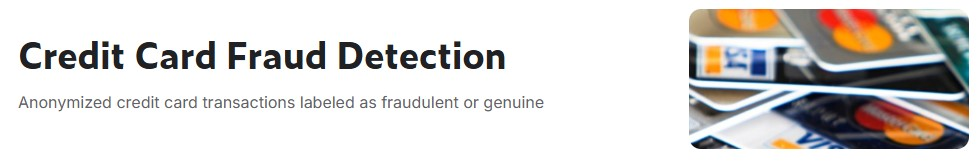

## Objetivo
Esse notebook tem como objetivo propor um modelo para detecção de fraude no uso do cartão de crédito, os dados utilizados estão disponíveis na plataforma [Kaggle](https://www.kaggle.com/) na página especifíca [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud). Compete desenvolvemo um modelo de classificação binário capaz de informar se determinada transação futura se mostrar fraudulenta com base nos dados apresentados 

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd

In [2]:
print(f'Versão do numpy: {np.__version__}')
print(f'Versão do pandas: {pd.__version__}')

Versão do numpy: 2.1.2
Versão do pandas: 2.2.3


## Importados os dados

In [3]:
#Caminho dos dados
push = "C:\\Users\\Mickael\\OneDrive\\Projects\\Dados\\creditcard.csv"

#DataFrame pandas
dados = pd.read_csv(push)
dados

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
# Tamanho da base de dados
print(f'Número de linhas: {dados.shape[0]}')
print(f'Número de Colunas: {dados.shape[1]}')

Número de linhas: 284807
Número de Colunas: 31


In [5]:
#Verificando a existe valores null, se existe algum elemento que a informação na base de dados que não foi informando
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Na base de dados, nem um das variáveis possue valores faltantes ou de tipos diferentes. Isso é indicado pela coluna de contagem de valores null não apesentarem qualquer valor assim como em todas as colunas os dados são do mesmo tipo,  float64 ou int64.

A coluna com `Class` representa se a transação realizada foi classificada como fraudulenta ou legítima, sendo a classíficação da seguinte forma:
> 0 - **para transação não fraudulenta, legítima.**  
> 1 - **para transação fraudulenta**

In [6]:
#Contagem de valores absolutos na coluna Class
dados['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
#Contagem de valores relativos na coluna Class
dados['Class'].value_counts(normalize=True)*100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

De acordo como as informações geradas nas células de código acima podemos observa que existem um total de $284807$ transações, sendo $284315$ transações legítimas e $492$ fraudulentas, em temos percentuas temos aproximadamente $99,827\ \%$ das transações sendo legítimas e $0,173\ \%$ fraudulentas. Existe um enorme discrepância entre dados considerados fraudulentos e legítimos para evitar um viés no modelo a ser criados devemos por meio de algum técnica reduzir o esse desequilíbrio nesse grupo.

In [8]:
def intervalo(dados,index_excluir=None):
    # Obtendo duas listas, uma com o valores máximo e outra com o valor míninos de da série de dados
    maximos = [float(dados[i].max()) for i in dados.columns]
    mininos = [float(dados[i].min()) for i in dados.columns]
    
    # Transformando essas duas listas em um dicionario python
    dif = {"Maximos": maximos, "Mininos":mininos}
    
    # Transplantado as informações para um DataFrame pandas
    diferenca = pd.DataFrame(dif)
    
    # Mostrando o intervalo entre o menor valor na série de dados e o Maior valor da série
    diferenca["Intervalo"] = diferenca["Maximos"] - diferenca["Mininos"]
    
    # Alterando o index para referencia as colunas dos valores
    diferenca.index = dados.columns
    
    # Excluindo a linha referente a Class, se a transação e considerada fraudulenta ou legítima.
    if index_excluir != None:
        diferenca.drop(index=[index_excluir], inplace=True)
    
    # Mostrando DataFrame
    return diferenca

In [9]:
diferenca = intervalo(dados,index_excluir="Class")

In [10]:
#Menor valor presente na intervalo
diferenca["Intervalo"].min()

np.float64(6.12189616443197)

In [11]:
#Maior valor presente no intervalo
diferenca["Intervalo"].max()

np.float64(172792.0)

In [12]:
#Média dos valores presente no intervalo
diferenca["Intervalo"].mean()

np.float64(6662.397749329988)

In [13]:
#Mediana dos valores presente no intervalo
diferenca["Intervalo"].median()

np.float64(41.374862088849824)

Das informações obtidas nas células acima podemos observa uma grande variação dos valores assumido por cada uma das variáveis em seus respectivos intervalos de valores, devesse isso principalmente as variáveis referente as `"Time"` e `"Amount"`. Mesmo que viessemos a excluir elas, o que não devemos por se tratar de informação importante para modelagem, os valores discrepântes continuariam a existir. Por isso devemos aplicar algum transformação no dados presentes de formar que essa distorção não venha atrapalha a elaboração do modelos de decisão.  

## Manipulação dos dados

Realizaremos a transformação da base de dados e o balanceamento após essa transformação, com o objetivo de torná-las mais adequadas aos padrões aceitos pelos diversos modelos. Entre os diversos motivos para "transformação" dos dados podemos destacar os seguintes:

> 1 - **Uniformidade**: Seja a normalização, ajustar os dados para um intervalo comum, ou padronização, que ajusta os dados a se encaixarem em um distribuição normal, iremos garanti que seus valores tenham a mesma escala.\
> 2 - **Precisão nos Modelos**: Em análises estatísticas e algoritmos de machine learning, variáveis com escalas diferentes podem distorcer os resultados. A normalização e a padronização reduzem esse problema, permitindo que cada variável tenha um impacto proporcional.\
> 3 - **Melhoria do Desempenho dos Algoritmos**: Muitos algoritmos de machine learning e modelos estatísticos são sensíveis à escala dos dados. Assim à normalização ou padronização podem melhorar a eficiência e a velocidade desses algoritmos.\
> 4 - **Evitar Viés**: Um discrepância alta entre os valores númericos apresentados durante o desenvolvimento do modelo pode introduzir viés nos modelos analíticos, onde variáveis com maiores valores numéricos influenciam mais o modelo.\
> 5 - **Facilidade de Interpretação**: Dados normalizados ou padronizados são mais fáceis de interpretar e comparar.\
> 6 - **Redução de Outliers**: Embora não elimine outliers, a normalização pode reduzir seu impacto, tornando os dados mais robustos para análise.

### Transformação

Realizando um transformção nos dados para um manipulação mais eficiente dos modelos que serão testados, realizaremos duas transformações:

>1 - **Padronização**: Sendo $X$ o valor que será transfornado, $\mu$ a média e $\sigma$ o desvio padrão dos dados, a padronização do valor $X$ será dados por:

<center>$z = \displaystyle\frac{X - \mu}{\sigma}$<center>

Onde o valor $z$ é chamado de z-score.

>2 - **Normalização**: Sendo $X$ o valor que será transformado, $X_{Min}$ o menor valor da série dos dados e $X_{Max}$ o maior valor da série de dados, a normalização do valor $X$ será dado por:
    
<center>$X^{'}=\displaystyle\frac{X-X_{Min}}{X_{Max}-X_{Min}}$<center>

In [14]:
#Arry com o nome das colunas do DataFrame Dados
colunas = dados.columns

#Arry com o nome das 30 colunas do DataFramde Dados
colunas = np.delete(colunas, len(colunas)-1)

#Dados padronizados
padronizados = pd.DataFrame()

#Dados Normalizados
normalizados = pd.DataFrame()

#Inserção dos dados padronizados
for i in colunas:
    mean = dados[i].mean() #Média da i-coluna
    std = dados[i].std() #Desvio padrão
    padronizados[i] = [(i-mean)/std for i in dados[i]] #Arry com os dados da i-coluna

#Inserção dos dados normalizados
for i in colunas:
    i_max = dados[i].max() #Maior valor da i-coluna
    i_min = dados[i].min() #Menor valor da i-coluna
    normalizados[i] = [(i-i_min)/(i_max-i_min) for i in dados[i]] #Arry com dados da i-coluna

#Inserir os valores de Class nos DataFramde padronizados e normalizados
padronizados['Class'] = dados['Class']
normalizados['Class'] = dados['Class']

In [23]:
#Salvado os dados normalizados e padronizados
normalizados.to_csv(push[:41] + "normalizados.csv", index = False)
padronizados.to_csv(push[:41] + "padronizados.csv", index = False)

In [25]:
intervalo(padronizados,index_excluir="Class")

,Maximos,Mininos,Intervalo
Time,1.642055,-1.996580,3.638634
V1,1.253349,-28.798504,30.051854
V2,13.357727,-44.035215,57.392941
V3,6.187982,-31.871677,38.059659
V4,11.918722,-4.013912,15.932634
V5,25.214090,-82.407952,107.622042
V6,55.020053,-19.636023,74.656076
V7,97.478068,-35.209334,132.687402
V8,16.751505,-61.302416,78.053921
V9,14.194920,-12.227994,26.422914


In [26]:
intervalo(normalizados,index_excluir="Class")

,Maximos,Mininos,Intervalo
Time,1.0,0.0,1.0
V1,1.0,0.0,1.0
V2,1.0,0.0,1.0
V3,1.0,0.0,1.0
V4,1.0,0.0,1.0
V5,1.0,0.0,1.0
V6,1.0,0.0,1.0
V7,1.0,0.0,1.0
V8,1.0,0.0,1.0
V9,1.0,0.0,1.0


## Métricas para seleção do modelo

Para avaliação do modelo utilizaremos como parametros a **matriz de confusão**, a matriz permitir visualizar e interpretar as respostas do modelo para os dados de entrada com see respectivo valor real, ela consite basicamente de uma tabela de frequência com os dados classificados corretamente ou incorretamente pelo modelo proposto.

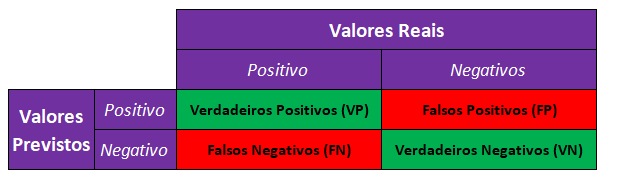

Os quadros elementos que fundamental a matriz são:
> 1 - **Verdadeiro Positivo (VP)**: É o número de instâncias da classe positiva que foram corretamente classificadas pelo modelo.\
> 2 - **Falso Positivo (FP)**: É o número de instâncias da classe negativa que foram erroneamente classificadas como positivas pelo modelo.\
> 3 - **Verdadeiro Negativo (VN)**: É o número de instâncias da classe negativa que foram corretamente classificadas pelo modelo.\
> 4 - **Falso Negativo (FN)**: É o número de instâncias da classe positiva que foram erroneamente classificadas como negativas pelo modelo.

https://medium.com/comunidadeds/matriz-de-confus%C3%A3o-nunca-mais-se-confunda-utilizando-esse-exemplo-35a9ac63b88a#:~:text=M%C3%A9tricas%20da%20Matriz%20de%20Confus%C3%A3o,dados%20(total%20de%20previs%C3%B5es).

### Métricas

Por meio da matriz de confusão podemos ter várias métricas possiveis para determinar se um modelo proposto tem um bom desempenho, são alguns métricas referenciados por essa matriz: **sensibilidade**, **Acurácia**, **Especificidade**, **valor preditivo positivo** e **F1-Score**, existem outras métricas possíveis para seleção de modelos. Destacamos as seguintes:

**Sensibilidade**, **recall** ou **taxa de verdadeiro positivo**
> $Sensibilidade = \dfrac{VP}{VP+FN}$

A sensibilidade consiste da razão entre a quantidade de valores que o modelo prévio como não fraudulentos pelo total de transações não fraudulentas, isso torna essa métrica muito interessante para utilizamos como classificação do modelo, quanto maior o valor da sensibilidade mais adequando e o algoritmo de decisão.
**Acurácia**
**Precisão**
**Especificidade**
**Valor Preditivo Positivo** ou **Precisão**
> $\text{Valor Preditivo Positivo} = \dfrac{VP}{VP+FP}$

O valor preditivo positivo consiste da razão do número de valores que o modelo prévio como não fraudulento pelo total de previsões não fraudulenta do modelo, estamos básicamente análisado o percentual de acerto do modelo proposto para transações não fraudulentas, assim quanto maior o valor preditivo melhor o algoritmo de decisão.

### Métrica Utilizada

**F1-Score** corresponde a média harmônica entre **Sensibilidade** e **Valor Preditivo Positivo**
> $\text{F1-Score} = \dfrac{2}{\dfrac{1}{\text{Sensibilidade}}+\dfrac{1}{\text{Valor Preditivo Positivo}}} = \dfrac{2\cdot\text{Sensibilidade}\cdot\text{Valor Preditivo Positivo}}{\text{Sensibilidade}+\text{Valor Preditivo Positivo}}$

Diante da consideramos nós e interessante um modelo com alta sensibilidade e valor preditivo positivo, podemos combinar essa duas métricas no F1-Score, sendo o F1-Score máximo quando a sensibilidae e valor preditivo positivo apresentam seus valores máximos, 1, por essa caracteristica selecionaremos o F1-Score como métrica definitiva para decisão final do algoritmo.

Existem diversas outras métricas para definimos ao final o modelo a se utilizado como **Especificidade (Specificity)**, **Área sob a Curva ROC (AUC-ROC)** ou **Erro Quadrático Médio (Mean Squared Error ou MSE)**, entretanto vamos nos até principalmente a **F1-Score**.

## Base de Treino e Validação

Para construção do modelos devemos separar os dados disponiveis em dois grupos de dados, um destinado a construção do modelo e outro a sua validação/avaliação do modelo proposto. Devemos ter em mente que ambos grupos de dados devem apresenta a mesma proporção entre dados fraudulentos e legítimos. Separaremos os dois grupos por meio de um processo de amostragem estratificada simple, acerca disso construiremos uma função que faça a construção dos dois DataFrame a partir da catégoria `Class`.

In [56]:
# Função para estratificação simples
def estratificacao_simples(dados,tamanho):

    #Percentual dos dados
    percentual = dados["Class"].value_counts("normalizer")

    #Tamanho das estratificação
    n = int(tamanho*percentual[0]) #Quantidade de transações legítimas
    m = tamanho - n #Quantidade de transações fraudulentas

    #Solteando os elementos de cada class
    zeros = dados.query("Class==0").sample(n) #Elementos legítimos
    uns = dados.query("Class==1").sample(m) #Elementos Fraudulentos

    #DataFrame de Treino e Validação
    validacao = pd.concat([zeros,uns]) #Unificação dos elementos solteados em um único dataframe
    treino = dados.drop(validacao.index) #Excluir elementos solteados do dataframe original

    #Nova indexização dos dataframe de treino e validação
    validacao.index = range(len(validacao))
    treino.index = range(len(treino))

    return treino, validacao

### Dados Desbalanceados

Chamanos de classe majoritária aquela que apresenta a maior quantidade de dados, as transações não fraudulentas, e classe minoritária, as transações fraudulentas, aquela que apresenta a menor quantidade de dados.

#### Undersampling

#### Oversampling

## Modelagem pelo Sciki-learn

Recorrendo a [Scikit-Learn](https://scikit-learn.org/stable/index.html) biblioteca comumente utilizada para treina, desenvolver e validar modelos estatísticos e de machine learning.    
Entre os diversos tipos de modelos presentes na biblioteca sejam ele de classificação, o grupo de modelos que nos interessa, regressão e clusterização optamos pelos cincos mais comuns de serem utilizados

Index|Modelo
:--:|:--
1|[Regressão Logística](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
2|[Árvores de Decisão](https://scikit-learn.org/stable/modules/tree.html)
3|[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
4|[Support Vector Machines (SVM)](https://scikit-learn.org/stable/modules/svm.html#)
5|[K-Nearest Neighbors (KNN)](https://scikit-learn.org/stable/modules/neighbors.html)

In [58]:
#Separar os dados "brutos" para teste e treino
treino, teste = estratificacao_simples(normalizados, tamanho = 10000)

In [59]:
#Subconjuntos para treino  
treino_x = treino[treino.columns[:30]]
treino_y = [treino.loc[i][30] for i in range(len(treino))]#Transformado treino_y em um vetor 1D

#Subconjuntos para validação
teste_x = teste[teste.columns[:30]]
teste_y = [teste.loc[i][30] for i in range(len(teste))]#Transformado teste_y em um vetor 1D

C:\Users\Mickael\AppData\Local\Temp\ipykernel_7724\3707043307.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  treino_y = [treino.loc[i][30] for i in range(len(treino))]#Transformado treino_y em um vetor 1D
C:\Users\Mickael\AppData\Local\Temp\ipykernel_7724\3707043307.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  teste_y = [teste.loc[i][30] for i in range(len(teste))]#Transformado teste_y em um vetor 1D


### Treinando os modelos

In [60]:
#Importação dos modelos para treino
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Pontuação dos modelos
from sklearn.metrics import precision_score#Valor preditivo positivo
from sklearn.metrics import recall_score#Sensibilidade
from sklearn.metrics import f1_score#F1-Score

In [71]:
DecisionTreeClassifier.__version__.__module__

AttributeError: type object 'DecisionTreeClassifier' has no attribute '__version__'

In [61]:
# Criar instâncias dos modelos
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
svm = SVC()

#### Regressão Logística

In [62]:
modelo  = logistic_regression.fit(treino_x, treino_y)
previsao = modelo.predict(teste_x)
print(precision_score(teste_y, previsao))
print(f1_score(teste_y, previsao))
print(recall_score(teste_y, previsao))

0.9
0.6428571428571429
0.5


#### Árvore de decisão

In [63]:
modelo  = decision_tree.fit(treino_x, treino_y)
previsao = modelo.predict(teste_x)
print(precision_score(teste_y, previsao))
print(f1_score(teste_y, previsao))
print(recall_score(teste_y, previsao))

0.8421052631578947
0.8648648648648649
0.8888888888888888


#### Random Forest

In [64]:
modelo  = random_forest.fit(treino_x, treino_y)
previsao = modelo.predict(teste_x)
print(precision_score(teste_y, previsao))
print(f1_score(teste_y, previsao))
print(recall_score(teste_y, previsao))

1.0
0.9714285714285714
0.9444444444444444


#### Support Vector Machines (SVM)

In [65]:
modelo  = svm.fit(treino_x, treino_y)
previsao = modelo.predict(teste_x)
print(precision_score(teste_y, previsao))
print(f1_score(teste_y, previsao))
print(recall_score(teste_y, previsao))

0.9444444444444444
0.9444444444444444
0.9444444444444444


#### K-Nearest Neighbors (KNN)

In [66]:
modelo  = knn.fit(treino_x, treino_y)
previsao = modelo.predict(teste_x)
print(precision_score(teste_y, previsao))
print(f1_score(teste_y, previsao))
print(recall_score(teste_y, previsao))

0.9411764705882353
0.9142857142857143
0.8888888888888888
